In [1]:
from __future__ import print_function, division

%matplotlib inline

import thinkdsp
import thinkplot

import warnings
warnings.filterwarnings('ignore')

from IPython.html.widgets import interact, fixed
from IPython.display import display

##### Exercise
Go to http://freesound.org and download a sound sample that includes music, speech, or other sounds that have a well-defined pitch. Select a roughly half-second segment where the pitch is constant. Compute and plot the spectrum of the segment you selected. What connection can you make between the timbre of the sound and the harmonic structure you see in the spectrum?

Use high_pass, low_pass, and band_stop to filter out some of the harmonics. Then convert the spectrum back to a wave and listen to it. How does the sound relate to the changes you made in the spectrum?

轉到 http://freesound.org 並下載聲音樣本，其中包括音樂，語音或其他音高明確的聲音。選擇一個大約半秒的音高恆定的片段。計算並繪製所選段的光譜。您可以在聲音的音色和頻譜中看到的諧波結構之間建立什麼聯繫？

使用high_pass，low_pass和band_stop過濾掉一些諧波。然後將頻譜轉換回一波並聽一聽。聲音與您在頻譜中所做的更改有何關係？

In [3]:
wave = thinkdsp.read_wave('170255__dublie__trumpet.wav')
wave.normalize()
wave.make_audio()

Here's what the whole wave looks like:

這些波看起來是這樣:


In [4]:
wave.plot()

import matplotlib.pyplot as pl
pl.grid()

##### By trial and error, I selected a segment with a constant pitch (although I believe it is a chord played by at least two horns).
通過反複試驗，我選擇了一個音高恆定的片段（儘管我相信這是至少兩個喇叭演奏的和弦）。

In [5]:
segment = wave.segment(start=1.1, duration=0.3)
segment.make_audio()

##### Here's what the segment looks like:

##### 這片段看起來是

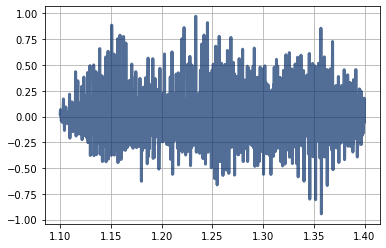

In [6]:
segment.plot()
pl.grid()

##### And here's an even shorter segment so you can see the waveform:
這是一個更短的片段，因此您可以看到波形：

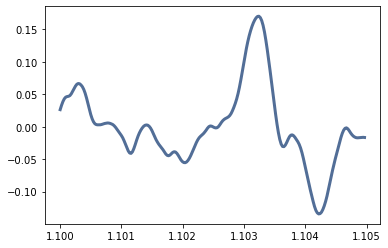

In [7]:
segment.segment(start=1.1, duration=0.005).plot()


##### Here's what the spectrum looks like:
光譜看起來如下

In [8]:
spectrum = segment.make_spectrum()
spectrum.plot(high=7000)
pl.grid()

##### It has lots of frequency components. Let's zoom in on the fundamental and dominant frequencies:
它具有很多頻率分量。讓我們放大基本頻率和主導頻率：

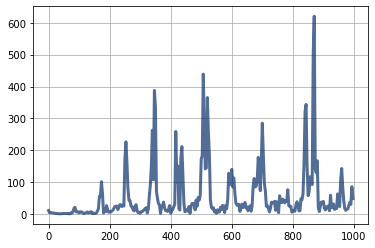

In [9]:
spectrum = segment.make_spectrum()
spectrum.plot(high=1000)
pl.grid()

##### peaks prints the highest points in the spectrum and their frequencies, in descending order:
峰值按降序打印頻譜及其頻率中的最高點：

In [10]:
spectrum.peaks()[:30]
spectrum.peaks??

##### The dominant peak is at 870 Hz. It's not easy to dig out the fundamental, but with peaks at 507, 347, and 253 Hz, we can infer a fundamental at roughly 85 Hz, with harmonics at 170, 255, 340, 425, and 510 Hz.

85 Hz is close to F2 at 87 Hz. The pitch we perceive is usually the fundamental, even when it is not dominant. When you listen to this segment, what pitch(es) do you perceive?

Next we can filter out the high frequencies:
主峰在870 Hz。找出基頻並不容易，但是在507、347和253 Hz處有峰值時，我們可以推斷出約85 Hz的基頻，在170、255、340、425和510 Hz處產生諧波。

85 Hz在87 Hz時接近F2。我們所了解的音調通常是基本音調，即使它不是主要音調也是如此。當您收聽此段時，您會感覺到什麼音調？

接下來，我們可以過濾掉高頻：

In [11]:
spectrum.low_pass(2000)

And here's what it sounds like:


In [12]:
spectrum.make_wave().make_audio()

The following interaction allows you to select a segment and apply different filters. If you set the cutoff to 3400 Hz, you can simulate what the sample would sound like over an old (not digital) phone line.
通過以下互動，您可以選擇細分並應用不同的過濾器。如果將截止頻率設置為3400 Hz，則可以模擬在舊的（非數字）電話線上採樣的聲音。

In [13]:
def filter_wave(wave, start, duration, cutoff):
    """Selects a segment from the wave and filters it.
    
    Plots the spectrum and displays an Audio widget.
    
    wave: Wave object
    start: time in s
    duration: time in s
    cutoff: frequency in Hz
    """
    segment = wave.segment(start, duration)
    spectrum = segment.make_spectrum()

    spectrum.plot(high=5000, color='0.7')
    spectrum.low_pass(cutoff)
    spectrum.plot(high=5000, color='#045a8d')
    thinkplot.config(xlabel='Frequency (Hz)')
    
    audio = spectrum.make_wave().make_audio()
    display(audio)

In [14]:
interact(filter_wave, wave=fixed(wave), 
         start=(0, 5, 0.1), duration=(0, 5, 0.1), cutoff=(0, 5000, 100));

interactive(children=(FloatSlider(value=2.0, description='start', max=5.0), FloatSlider(value=2.0, description…

交互式（兒童=（FloatSlider（值= 2.0，說明=“開始”，最大值= 5.0），FloatSlider（值= 2.0，說明…

interactive(children=(FloatSlider(value=2.0, description='start', max=5.0), FloatSlider(value=2.0, description…
